In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import keras
import keras.optimizers as optimizers
from keras import layers, callbacks
from keras import regularizers
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
import pyreadr
from sklearn.preprocessing import MinMaxScaler

## Data Preprocessing

In [2]:
df_normal_train = pyreadr.read_r("TEP_FaultFree_Training.RData")
df_normal_train = df_normal_train['fault_free_training']
df_normal_test = pyreadr.read_r("TEP_FaultFree_Testing.RData")
df_normal_test = df_normal_test['fault_free_testing']
df_normal_test.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


In [3]:
df_faulty_train = pyreadr.read_r("TEP_Faulty_Training.RData")
df_faulty_train = df_faulty_train['faulty_training']
df_faulty_test = pyreadr.read_r("TEP_Faulty_Testing.RData")
df_faulty_test = df_faulty_test['faulty_testing']
df_faulty_train

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,20,500.0,496,0.23419,3655.3,4461.7,9.3448,27.008,42.481,2703.0,...,53.670,23.350,61.061,20.719,40.999,38.653,47.386,47.528,40.212,17.659
4999996,20,500.0,497,0.26704,3647.4,4540.2,9.3546,27.034,42.671,2704.7,...,54.650,26.362,60.020,20.263,41.579,33.624,47.536,47.647,41.199,18.741
4999997,20,500.0,498,0.26543,3630.3,4571.6,9.4089,27.129,42.470,2705.1,...,54.274,26.521,59.824,20.189,41.505,40.967,52.437,47.802,41.302,23.199
4999998,20,500.0,499,0.27671,3655.7,4498.9,9.3781,27.353,42.281,2705.8,...,53.506,26.781,62.818,20.453,40.208,40.957,47.628,48.086,40.510,15.932


In [4]:
df_normal_train.columns

Index(['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11'],
      dtype='object')

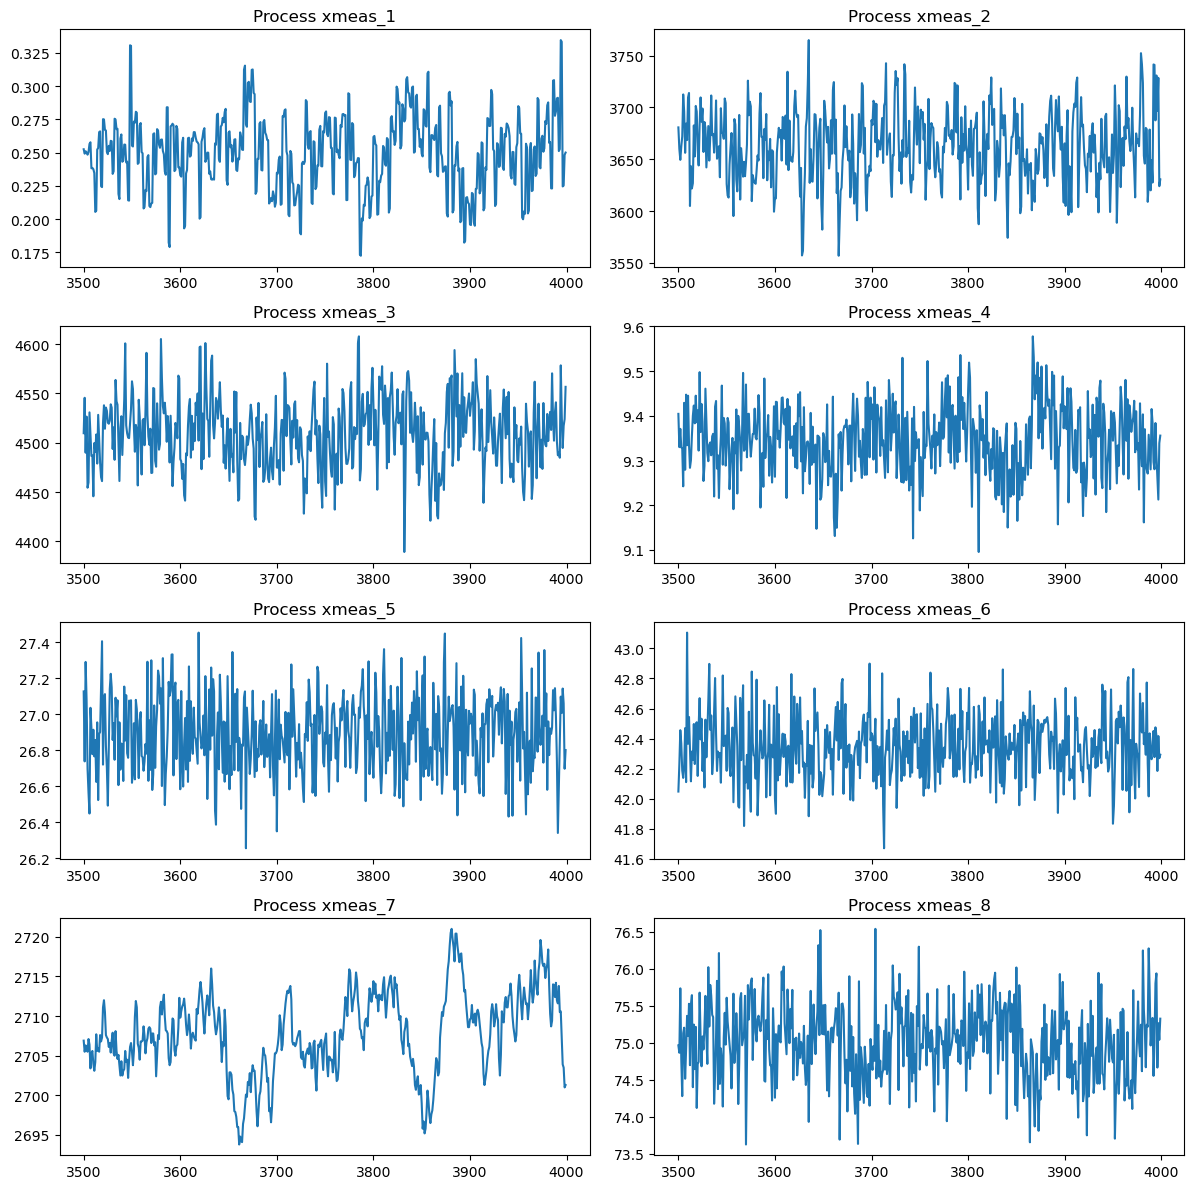

In [5]:
plt.figure(figsize=(12, 12))
process = 38
index = 7
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.title(f"Process xmeas_{i+1}")
    plt.plot(df_normal_train[f'xmeas_{i+1}'][index*500:index*500+500])
fig = plt.gcf()
fig.tight_layout()
plt.show()

In [6]:
features = ['xmeas_1', 'xmeas_2','xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']
datasets = [df_normal_train, df_normal_test, df_faulty_train, df_faulty_test]

In [7]:
scaler = MinMaxScaler()
for df in datasets:
    a = scaler.fit_transform(df[features])
    df[features] = a
    df
df_normal_test

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1.0,1,0.482238,0.526136,0.364957,0.708713,0.575942,0.570481,0.547033,...,0.624504,0.473927,0.367872,0.522155,0.533329,0.594539,0.579963,0.476661,0.702419,0.328431
1,0,1.0,2,0.484592,0.432172,0.656695,0.588481,0.543792,0.632946,0.541245,...,0.338623,0.471584,0.438315,0.533805,0.519701,0.463072,0.434135,0.484882,0.395718,0.380963
2,0,1.0,3,0.469874,0.434972,0.482336,0.435393,0.503880,0.462687,0.516643,...,0.509218,0.486510,0.454715,0.489286,0.528033,0.663440,0.409889,0.483946,0.551943,0.702078
3,0,1.0,4,0.481566,0.388923,0.515954,0.490278,0.543792,0.491432,0.522431,...,0.476546,0.474909,0.572680,0.443936,0.532764,0.594231,0.584612,0.482359,0.440722,0.458516
4,0,1.0,5,0.354936,0.474487,0.663248,0.458282,0.489468,0.531233,0.577424,...,0.347491,0.369937,0.571096,0.533597,0.360119,0.526213,0.416138,0.486021,0.501983,0.572505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,0,500.0,956,0.529192,0.523335,0.491738,0.429363,0.622506,0.473190,0.464544,...,0.495683,0.530419,0.554137,0.534637,0.558819,0.466144,0.687947,0.697269,0.469865,0.585162
479996,0,500.0,957,0.480781,0.218108,0.415100,0.431824,0.324834,0.480929,0.438495,...,0.453209,0.476119,0.512952,0.432910,0.515252,0.366478,0.567915,0.704879,0.566019,0.584650
479997,0,500.0,958,0.479773,0.371189,0.270940,0.570391,0.381929,0.273632,0.458755,...,0.594632,0.477177,0.557492,0.491991,0.529727,0.422130,0.594261,0.712652,0.315821,0.434226
479998,0,500.0,959,0.457958,0.489110,0.418803,0.556485,0.508869,0.662244,0.473227,...,0.343291,0.468032,0.656821,0.499688,0.490044,0.423052,0.506974,0.715012,0.497224,0.456614


In [8]:
# Create sequences

n_training = df_normal_train.drop(['faultNumber', 'simulationRun', 'sample'], axis=1)
n_testing = df_normal_test.drop(['faultNumber', 'simulationRun', 'sample'], axis=1)
f_training = df_faulty_train.drop(['faultNumber', 'simulationRun', 'sample'], axis=1)
f_testing = df_faulty_test.drop(['faultNumber', 'simulationRun', 'sample'], axis=1)
def create_sequences(data, sample_length):
    X = []
    for i in range(0, len(data), sample_length):
        X.append(data[i:i+sample_length])
    X = np.array(X)
    return X

n_train = create_sequences(n_training, 500)
n_test = create_sequences(n_testing, 960)
f_train = create_sequences(f_training, 500)
f_test = create_sequences(f_testing, 960)
n_train.shape

(500, 500, 52)

In [9]:
f_train.shape

(10000, 500, 52)

## Conventional Methods

In [102]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(n_training)

PCA(n_components=5)

In [103]:
# Reconstruct the normal data

X_pca = pca.transform(n_training)
X_rec = pca.inverse_transform(X_pca)
X_rec = create_sequences(X_rec, 500)
X_rec.shape

(500, 500, 52)

In [105]:
# Get threshold for anomaly score

error = np.mean(np.abs(n_train - X_rec), axis=1)
threshold = np.max(np.max(error, axis=0))
threshold

0.12599385034157276

In [106]:
# Predict using faulty data

y_pca = pca.transform(f_training)
y_rec = pca.inverse_transform(y_pca)
y_rec = create_sequences(y_rec, 500)
y_rec.shape

(10000, 500, 52)

In [107]:
# Calculate reconstruction error

f_error = np.mean(np.abs(f_train - y_rec), axis=1)
f_error

array([[0.24854844, 0.0646352 , 0.12313153, ..., 0.08676936, 0.06797277,
        0.30822355],
       [0.16106742, 0.18918268, 0.18622719, ..., 0.21864645, 0.01368642,
        0.31243538],
       [0.16881119, 0.14143157, 0.10404623, ..., 0.07831014, 0.01042384,
        0.30181435],
       ...,
       [0.16819488, 0.14542613, 0.06188117, ..., 0.3100611 , 0.11881745,
        0.27048784],
       [0.1685598 , 0.14316252, 0.10470806, ..., 0.08278542, 0.01021679,
        0.3026723 ],
       [0.17444166, 0.147195  , 0.10432452, ..., 0.0857878 , 0.01144328,
        0.30095812]])

In [108]:
# Using reconstruction error, calculate if time sequence sample is anomalous: L(X, X') > epsilon, where epsilon is threshold

def evaluate(error, threshold=threshold):
    anomalies = error > threshold
    if np.sum(anomalies) >=1:
        return 1
    return 0

result = []
for i in range(len(f_error)):
    result.append(evaluate(f_error[i,]))
anomalies = np.sum(np.array(result))
anomalies

10000

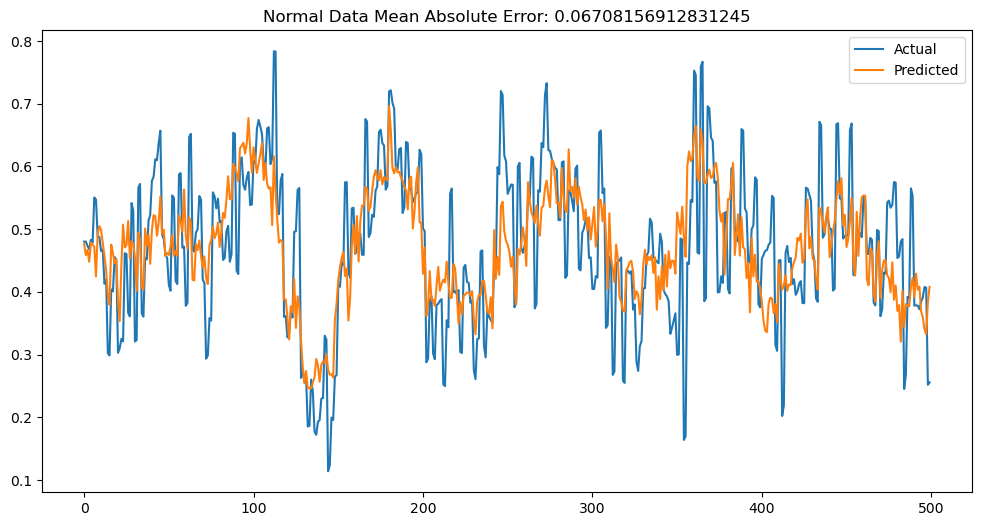

In [109]:
# Plot normal data and its reconstruction

plt.figure(figsize=(12, 6))
process = 0
sample = 6
a = pd.DataFrame({'values': n_train[sample][:, process]})
b = pd.DataFrame({'values': X_rec[sample][:, process]})
mean_error = np.mean(np.abs(X_rec[sample][:, process] - n_train[sample][:, process]))
plt.title(f"Normal Data Mean Absolute Error: {mean_error}")
plt.plot(a)
plt.plot(b)
plt.legend(['Actual', 'Predicted'])
plt.show()

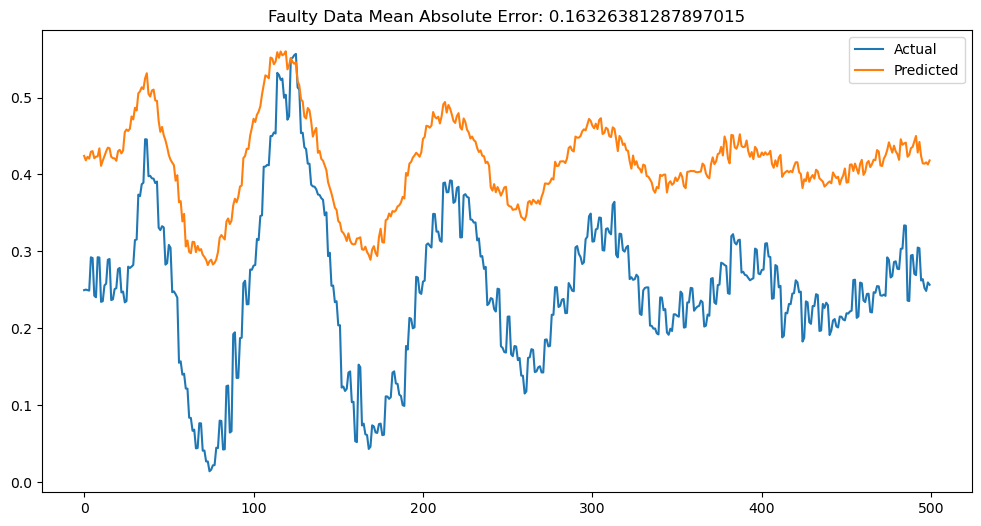

In [110]:
# Plot faulty data and its reconstruction

plt.figure(figsize=(12, 6))
process = 0
sample = 6
a = pd.DataFrame({'values': f_train[sample][:, process]})
b = pd.DataFrame({'values': y_rec[sample][:, process]})
mean_error = np.mean(np.abs(y_rec[sample][:, process] - f_train[sample][:, process]))
plt.title(f"Faulty Data Mean Absolute Error: {mean_error}")
plt.plot(a)
plt.plot(b)
plt.legend(['Actual', 'Predicted'])
plt.show()

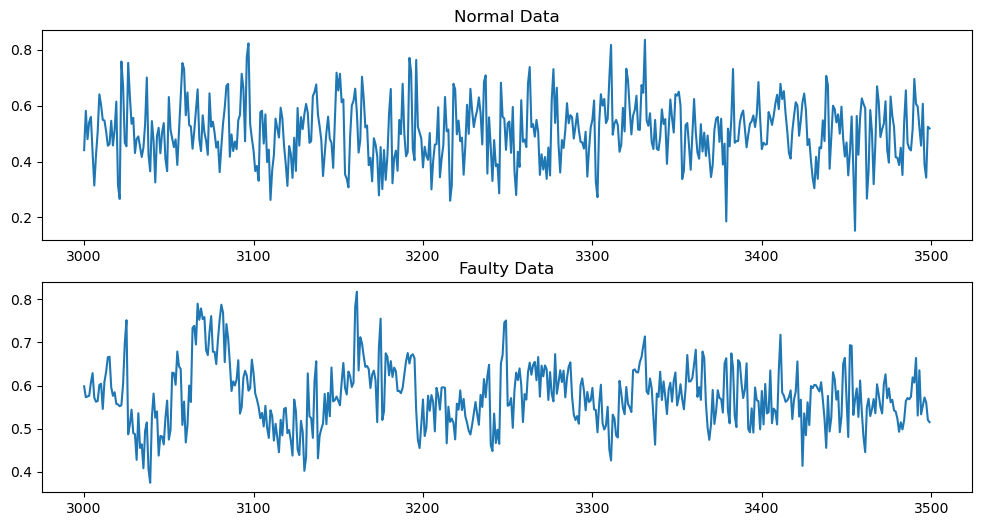

In [111]:
plt.figure(figsize=(12, 6))
process = 2
index = 6
plt.subplot(211)
plt.title("Normal Data")
plt.plot(df_normal_train[f'xmeas_{process}'][index*500:index*500+500])
plt.subplot(212)
plt.title("Faulty Data")
plt.plot(df_faulty_train[f'xmeas_{process}'][index*500:index*500+500])
plt.show()

## Machine Learning Methods

In [20]:
# Isolation Forests

## Deep Learning Methods (Autoencoders)

In [21]:
# 1DCNN

model = keras.Sequential(
    [
        layers.Input(shape=(n_train.shape[1], n_train.shape[2])),
        layers.Conv1D(filters=256, kernel_size=3, padding="same", strides=2, activation="relu"),
        layers.Conv1D(filters=32, kernel_size=3, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=32, kernel_size=3, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=256, kernel_size=3, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=n_train.shape[2], kernel_size=3, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 250, 256)          40192     
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 32)           24608     
                                                                 
 conv1d_transpose (Conv1DTr  (None, 250, 32)           3104      
 anspose)                                                        
                                                                 
 conv1d_transpose_1 (Conv1D  (None, 500, 256)          24832     
 Transpose)                                                      
                                                                 
 conv1d_transpose_2 (Conv1D  (None, 500, 52)           39988     
 Transpose)                                                      
                                                        

In [89]:
# Normal Autoencoder

model = keras.Sequential(
    [
        layers.Dense(128, input_shape=(n_train.shape[1], n_train.shape[2]), activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(n_train.shape[2])
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 500, 128)          6784      
                                                                 
 dense_57 (Dense)            (None, 500, 64)           8256      
                                                                 
 dense_58 (Dense)            (None, 500, 32)           2080      
                                                                 
 dense_59 (Dense)            (None, 500, 64)           2112      
                                                                 
 dense_60 (Dense)            (None, 500, 128)          8320      
                                                                 
 dense_61 (Dense)            (None, 500, 52)           6708      
                                                                 
Total params: 34260 (133.83 KB)
Trainable params: 342

In [90]:
history = model.fit(
    n_train,
    n_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
#     callbacks=[
#         keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min")
#     ],
    verbose=2
)

Epoch 1/50
4/4 - 2s - loss: 0.2625 - val_loss: 0.2132 - 2s/epoch - 460ms/step
Epoch 2/50
4/4 - 0s - loss: 0.1923 - val_loss: 0.1436 - 489ms/epoch - 122ms/step
Epoch 3/50
4/4 - 1s - loss: 0.1206 - val_loss: 0.0853 - 508ms/epoch - 127ms/step
Epoch 4/50
4/4 - 0s - loss: 0.0774 - val_loss: 0.0557 - 496ms/epoch - 124ms/step
Epoch 5/50
4/4 - 0s - loss: 0.0452 - val_loss: 0.0304 - 500ms/epoch - 125ms/step
Epoch 6/50
4/4 - 1s - loss: 0.0274 - val_loss: 0.0213 - 535ms/epoch - 134ms/step
Epoch 7/50
4/4 - 1s - loss: 0.0190 - val_loss: 0.0165 - 506ms/epoch - 127ms/step
Epoch 8/50
4/4 - 1s - loss: 0.0165 - val_loss: 0.0158 - 568ms/epoch - 142ms/step
Epoch 9/50
4/4 - 1s - loss: 0.0154 - val_loss: 0.0154 - 503ms/epoch - 126ms/step
Epoch 10/50
4/4 - 1s - loss: 0.0155 - val_loss: 0.0152 - 508ms/epoch - 127ms/step
Epoch 11/50
4/4 - 1s - loss: 0.0149 - val_loss: 0.0146 - 518ms/epoch - 130ms/step
Epoch 12/50
4/4 - 1s - loss: 0.0143 - val_loss: 0.0138 - 520ms/epoch - 130ms/step
Epoch 13/50
4/4 - 1s - loss:

In [91]:
n_pred = model.predict(n_train)
error = np.mean(np.abs(n_pred - n_train), axis=1)

threshold = np.max(error, axis=0)
max_threshold = np.max(threshold)
max_threshold

16/16 [==============================] - 0s 14ms/step


0.12492020452589743

In [92]:
# Faulty set

f_pred = model.predict(f_train)
error_test = np.mean(np.abs(f_pred - f_train), axis=1)
error_test

313/313 [==============================] - 5s 15ms/step


array([[0.26142194, 0.06833899, 0.13692317, ..., 0.07646918, 0.0424442 ,
        0.28853544],
       [0.21195495, 0.10456481, 0.19186157, ..., 0.17428365, 0.05664695,
        0.30898379],
       [0.18720082, 0.07431249, 0.1393207 , ..., 0.12728748, 0.03820302,
        0.29608604],
       ...,
       [0.23145457, 0.09471956, 0.10797861, ..., 0.31458331, 0.11385856,
        0.2976492 ],
       [0.18686534, 0.07408009, 0.14152663, ..., 0.12881808, 0.03799207,
        0.29355781],
       [0.18888668, 0.08054374, 0.14274985, ..., 0.13451113, 0.0363427 ,
        0.28957227]])

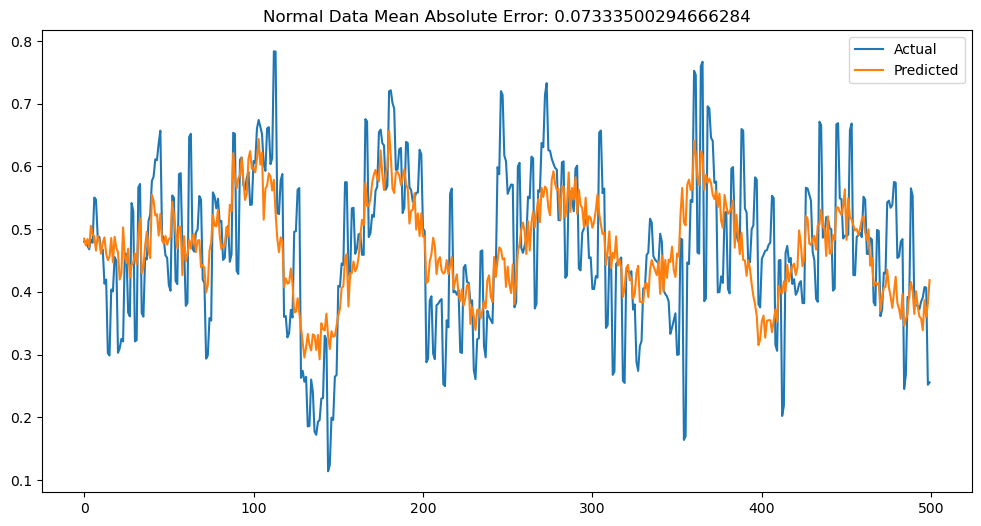

In [98]:
plt.figure(figsize=(12, 6))
process = 0
sample = 6
a = pd.DataFrame({'values': n_train[sample][:, process]})
b = pd.DataFrame({'values': n_pred[sample][:, process]})
mean_error = np.mean(np.abs(n_pred[sample][:, process] - n_train[sample][:, process]))
plt.title(f"Normal Data Mean Absolute Error: {mean_error}")
plt.plot(a)
plt.plot(b)
plt.legend(['Actual', 'Predicted'])
plt.show()

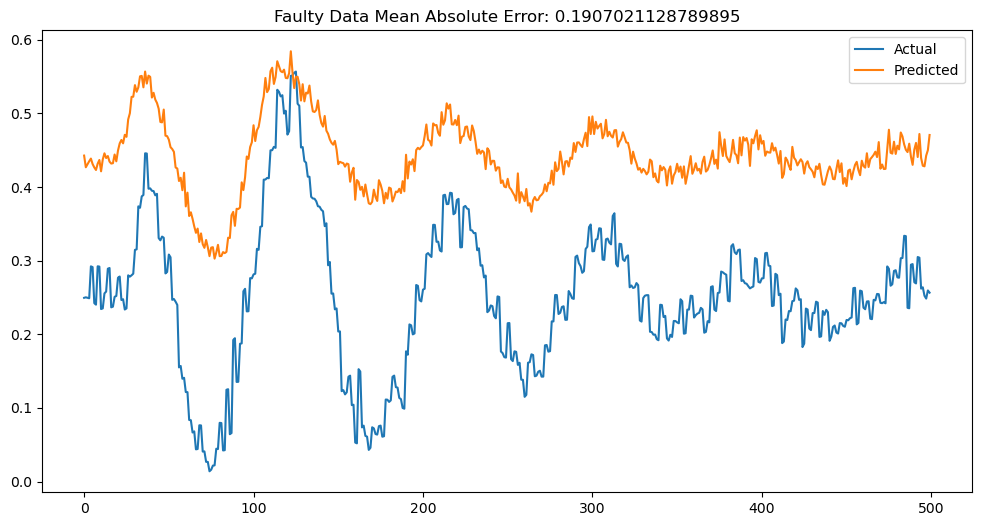

In [100]:
plt.figure(figsize=(12, 6))
process = 0
sample = 6
a = pd.DataFrame({'values': f_train[sample][:, process]})
b = pd.DataFrame({'values': f_pred[sample][:, process]})
mean_error = np.mean(np.abs(f_pred[sample][:, process] - f_train[sample][:, process]))
plt.title(f"Faulty Data Mean Absolute Error: {mean_error}")
plt.plot(a)
plt.plot(b)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [40]:
def evaluate(error, threshold=max_threshold):
    anomalies = error > threshold
    if np.sum(anomalies) >=1:
        return 1
    return 0

result = []
for i in range(len(error_test)):
    result.append(evaluate(error_test[i,]))
anomalies = np.sum(np.array(result))
anomalies

10000